In [7]:
import pandas as pd

# Downloading the MNIST Dataset


*   Here, we acquire both the test and train datasets.
*   We use " !wget " to download the datasets, as the MNIST is a very large dataset, and storing it our PC can eat up a lot of storage space.
*   The " !wget " method acquries the dataset directly from the source, in our source, Kaggle, and running the instance is enough to acquire the entire dataset.


In [8]:
!wget https://nkb-backend-otg-media-static.s3.ap-south-1.amazonaws.com/otg_prod/media/Tech_4.0/AI_ML/Datasets/kaggle_mnist/train.csv
!wget https://nkb-backend-otg-media-static.s3.ap-south-1.amazonaws.com/otg_prod/media/Tech_4.0/AI_ML/Datasets/kaggle_mnist/test.csv

--2024-06-28 15:20:27--  https://nkb-backend-otg-media-static.s3.ap-south-1.amazonaws.com/otg_prod/media/Tech_4.0/AI_ML/Datasets/kaggle_mnist/train.csv
Resolving nkb-backend-otg-media-static.s3.ap-south-1.amazonaws.com (nkb-backend-otg-media-static.s3.ap-south-1.amazonaws.com)... 3.5.208.15, 3.5.211.137, 52.219.156.106, ...
Connecting to nkb-backend-otg-media-static.s3.ap-south-1.amazonaws.com (nkb-backend-otg-media-static.s3.ap-south-1.amazonaws.com)|3.5.208.15|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 76775041 (73M) [text/csv]
Saving to: ‘train.csv.1’

train.csv.1         100%[===================>]  73.22M  15.3MB/s    in 6.3s    

2024-06-28 15:20:34 (11.6 MB/s) - ‘train.csv.1’ saved [76775041/76775041]

--2024-06-28 15:20:34--  https://nkb-backend-otg-media-static.s3.ap-south-1.amazonaws.com/otg_prod/media/Tech_4.0/AI_ML/Datasets/kaggle_mnist/test.csv
Resolving nkb-backend-otg-media-static.s3.ap-south-1.amazonaws.com (nkb-backend-otg-media-static.s3.

# .csv to Dataframes


*   The test and train datasets from MNIST are downloaded in the form of csv files.
*   .csv files are good and efficient to store data at one place, but we need to preprocess and clean the data that we acquired.
*   In order to make sure that data preprocessing is done, we need to convert the csv files into DataFrames.



In [9]:
#training set
train_df = pd.read_csv('train.csv')
train_X_df = train_df.drop('label', axis=1)
train_Y_df = train_df['label']
#testing set
test_X_df = pd.read_csv('test.csv')

*   We observe in the above instance that **train_df** is split into *train_X_df* and *train_Y_df*.
*   *train_X_df* contains all the columns from the dataset except the "Label" column.
*   *train_Y_df* contains only the "Label" column from the dataset, which is basically the output that needs to be predicted by the model.

# Splitting Data

*   We have split the data into 2 sets (i.e.) training and test data. But, we actually need to split the data into 3 parts (i.e.) testing data, *validation data* and test data.
*   Validation set is used to validate and evaluate the derived model, and produce a performance metric.

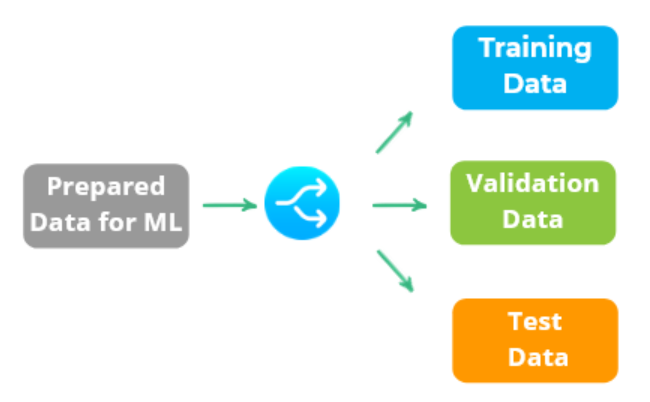

*sklearn.model_selection.train_test_split()*

* This method generally divides a dataframe into 2 subsets, generally train and test subsets.
* We use this method to split out train dataframe into train and validation dataframe.
* sklearn.model_selection.train_test_split(*arrays, test_size=None)


In [10]:
from sklearn.model_selection import train_test_split
train_X_split, validation_X_split, train_Y_split, validation_Y_split = train_test_split(train_X_df, train_Y_df, test_size=0.2)

print('Train X shape', train_X_split.shape)
print('Validation X shape', validation_X_split.shape)

Train X shape (33600, 784)
Validation X shape (8400, 784)


# Training

Now that we have the data, we need to start training our model in order for it to start making predictions!

*sklearn.neighbors.KNeighborsClassifier()*

* In our problem, we are going to use KNNClassifier model.
* KNN seems to be the best model based on our problem statement. This is because, when we spread the data in a 2-dimensional plane, the best way to determine the digit is to find the closed number with the highest frequnecy.
* sklearn.neighbors.KNeighborsClassifier(n_neighbors=5, p=2)

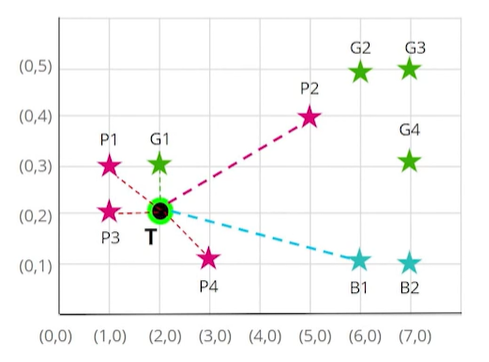


In [11]:
from sklearn.neighbors import KNeighborsClassifier
num_neighbors = 1
distance_param = 2
clf = KNeighborsClassifier(n_neighbors=num_neighbors, p=distance_param)
clf.fit(train_X_split, train_Y_split)

KNeighborsClassifier(n_neighbors=1)

# Tuning Hyperparameters

Hyperparameters- The parameters upon which the derived ML model is tuned in order to make it more time & space efficient are Hyperparameters.
* We define the Hyperparameters along with the test set while training process, which in turn generates a model.
* This derived model is then evaluated using Validation set to produce a Performance Metric.
* Now, we make changes to the already decided hyperparameters or change the hyperparameters entirely and repeat the process.
* This process is repeated until the find obtain the best Performance Metric, and the used Hyperparameters that helped us obtain this metric are finalised.

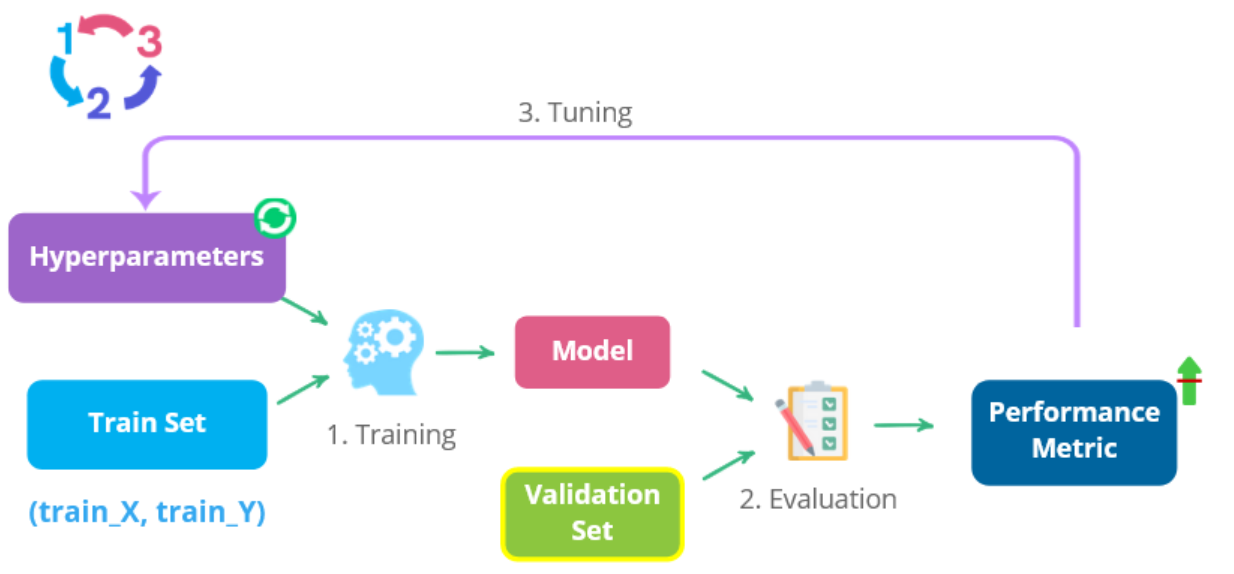

*sklearn.model_selection.GridSearchCV*

We use the GridSearch process to find out the best combination of hyperparameters, which would give us the best Performance Metric.

sklearn.model_selection.GridSearchCV(estimator, param_grid, scoring=None, n_jobs=None, refit=True, cv=None, verbose=0)

* estimator: The object that needs to be instantiated, in our case, KNNClassifier().
* param_grid: The set of values that we use for Hyperparameters.
* scoring: The best strategy or metric to evaluate the model upon.
* n_jobs: Defines the number of jobs or process that could parallely rather than waiting for one to end, and the next one to begin. This makes it time-efficient.
* refit: Refits the entire model with the best possible parameters found by the end of the process.

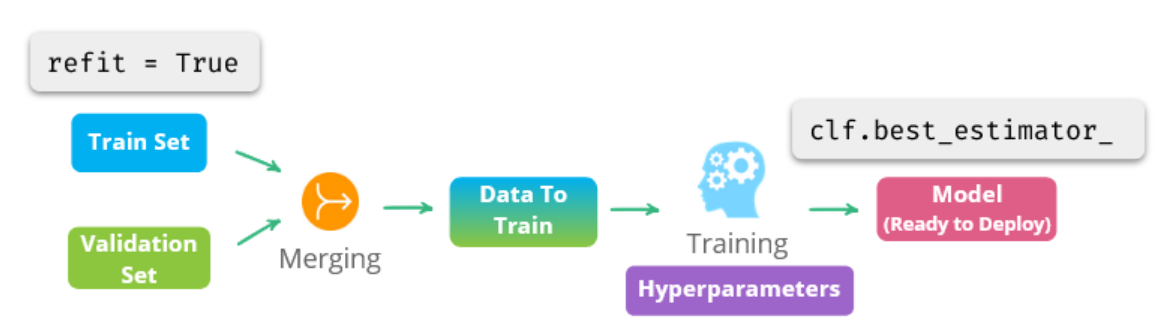



In [12]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

hyperparameters = {
    'n_neighbors': [10, 15],
    'p': [1,2]
}

clf = GridSearchCV(KNeighborsClassifier(), hyperparameters, scoring='accuracy', n_jobs=2, refit=True, cv=2, verbose=1)
clf.fit(train_X_df, train_Y_df)
print(clf.best_params_)

Fitting 2 folds for each of 4 candidates, totalling 8 fits
{'n_neighbors': 10, 'p': 2}


* clf.best_params_: Returns a dictionary that represents Hyperparameters that gave the best results, in our case, the best accuracy.



In [13]:
clf.cv_results_

{'mean_fit_time': array([0.8344233 , 0.32514703, 0.27088308, 0.3170687 ]),
 'std_fit_time': array([0.02086401, 0.05454075, 0.00297546, 0.0575422 ]),
 'mean_score_time': array([646.10108662,  70.75380194, 645.06770432,  68.09706104]),
 'std_score_time': array([0.22984052, 0.60528505, 0.53263676, 0.62012732]),
 'param_n_neighbors': masked_array(data=[10, 10, 15, 15],
              mask=[False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_p': masked_array(data=[1, 2, 1, 2],
              mask=[False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'n_neighbors': 10, 'p': 1},
  {'n_neighbors': 10, 'p': 2},
  {'n_neighbors': 15, 'p': 1},
  {'n_neighbors': 15, 'p': 2}],
 'split0_test_score': array([0.94690476, 0.95561905, 0.94204762, 0.95228571]),
 'split1_test_score': array([0.94595238, 0.95504762, 0.94138095, 0.95042857]),
 'mean_test_score': array([0.94642857, 0.95533333, 0.94171429, 0.95135714]),
 'std_test_score

# Predictions for the Test Data

* We have the model that gives us the best accuracy from the above step.
* Now, we use this model and predict the results of the test dataset, and compare the reuslts from the model with the actual result.
* If the model is rightfully trained, it would be able to predict the right number based on the input it's taking from the test dataset.

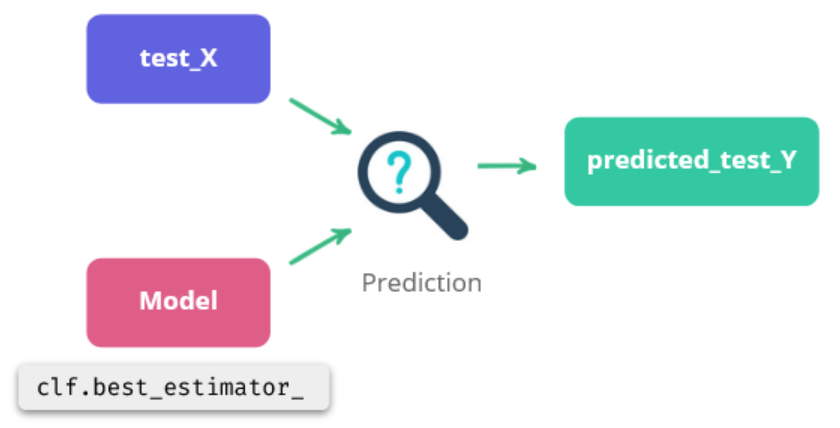

* clf.best_estimator_: This is the obtained estimator from the above process, or our derived ML model up until this step.
* model.predict(X): Predicts the labels or the digits using the derived/trained model and returns them in an array.



In [14]:
best_model = clf.best_estimator_
predicted_test_Y = best_model.predict(test_X_df)
predicted_test_Y

array([2, 0, 9, ..., 3, 9, 2])

# Visualizing the pixels as a gray-scale image

In [15]:
import numpy as np
import matplotlib.pyplot as plt

def visualise(image_df):
    image_1D = image_df.to_numpy()
    image_2D = image_1D.reshape((28,28))
    plt.imshow(image_2D, cmap=plt.get_cmap('gray'))
    plt.show()

# Final Predictions

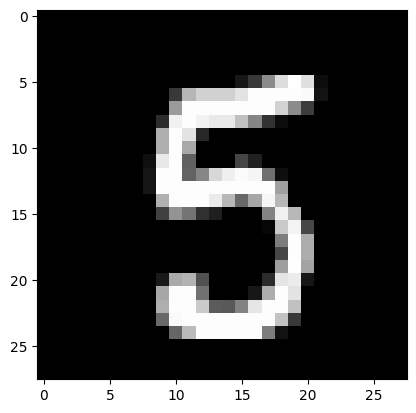

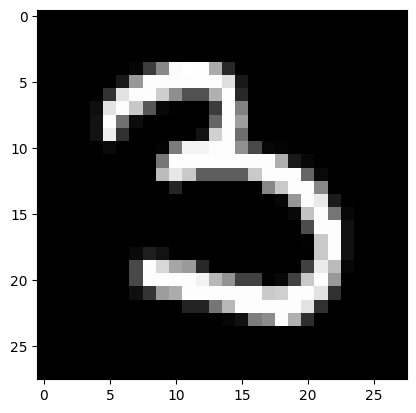

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array([5, 3])

In [16]:
visualise(test_X_df.loc[10])
visualise( test_X_df.loc[16])
clf.predict([test_X_df.loc[10], test_X_df.loc[16]])

# Deployment in Kaggle

In [17]:
predicted_test_Y_df = pd.DataFrame(predicted_test_Y)
predicted_test_Y_df.columns = ['Label']
predicted_test_Y_df.insert(loc=0, column='ImageId', value=predicted_test_Y_df.index + 1)
print(predicted_test_Y_df)

predicted_test_Y_df.to_csv('submission.csv', index=False)

       ImageId  Label
0            1      2
1            2      0
2            3      9
3            4      4
4            5      3
...        ...    ...
27995    27996      9
27996    27997      7
27997    27998      3
27998    27999      9
27999    28000      2

[28000 rows x 2 columns]
